In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
%matplotlib inline

In [47]:
def sum_of_square(vec_a, vec_b):
    diff = vec_a - vec_b
    diff_squared = np.square(diff)
    return (np.sum(diff_squared))

In [2]:
df = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\July2016_sorted_station_timeind.csv")

In [3]:
# df
# print(linear_model.LinearRegression.__doc__)
df.keys()

Index(['ObservationId', 'Timestamp', 'ParentLocationId', 'RelatedLocationId',
       'ReadingId', 'UtcTime', 'LocalTime', 'TimeZone', 'Temperature',
       'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindDirection',
       'WindDirectionCompass', 'WindSpeed', 'WindGust', 'RainSince9am',
       'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes', 'time_index'],
      dtype='object')

In [4]:
# for (t+5) forecasts, which means forecasting for the next 5 hours
# df.WindDirectionCompass.unique()
df['y_t_1'] = df.Temperature.shift(-1) # y_(t+1)
df['y_t_2'] = df.Temperature.shift(-2) # y_(t+2)
df['y_t_3'] = df.Temperature.shift(-3) # y_(t+3)
df['y_t_4'] = df.Temperature.shift(-4) # y_(t+4)
df['y_t_5'] = df.Temperature.shift(-5) # y_(t+5)

df.head(5)

,ObservationId,Timestamp,ParentLocationId,RelatedLocationId,ReadingId,UtcTime,LocalTime,TimeZone,Temperature,FeelsLike,...,RainSince9am,Pressure,RainfallLastHour,RainfallLast10Minutes,time_index,y_t_1,y_t_2,y_t_3,y_t_4,y_t_5
0,60,1467295200,1,94008,21,7/1/2016 0:00,7/1/2016 0:00,Australia/Hobart,8.8,6.7,...,0.0,1011,0.0,0.0,0.000000,11.0,11.7,12.6,12.5,11.8
1,59,1467298800,1,94008,21,7/1/2016 1:00,7/1/2016 1:00,Australia/Hobart,11.0,8.6,...,0.0,1012,0.0,0.0,0.041667,11.7,12.6,12.5,11.8,11.2
2,64,1467302400,1,94008,22,7/1/2016 2:00,7/1/2016 2:00,Australia/Hobart,11.7,9.2,...,0.0,1012,0.0,0.0,0.083333,12.6,12.5,11.8,11.2,10.8
3,63,1467306000,1,94008,22,7/1/2016 3:00,7/1/2016 3:00,Australia/Hobart,12.6,10.0,...,0.0,1011,0.0,0.0,0.125000,12.5,11.8,11.2,10.8,9.7
4,62,1467309600,1,94008,22,7/1/2016 4:00,7/1/2016 4:00,Australia/Hobart,12.5,10.3,...,0.0,1011,0.0,0.0,0.166667,11.8,11.2,10.8,9.7,11.1


In [12]:
# df.to_csv('July2016_pandas_df.csv')

In [5]:
y_gt = df.as_matrix(columns=['Temperature'])
print(y_gt.shape)

(744, 1)


In [6]:
tot_points = y_gt.shape[0]
train_points = 500
test_points = tot_points - train_points
print(tot_points, train_points, test_points)

744 500 244


In [7]:
# df.y_t_1.name

In [67]:
# x = df.as_matrix(columns=['time_index', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])

# x_t1 = df.as_matrix(columns=['time_index', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'Pressure'])
x_t1 = df.as_matrix(columns=['time_index', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])
# x_t1 = df.as_matrix(columns=['FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])

y_gt_t1 = df.as_matrix(columns=[df.y_t_1.name])

# get the next four vectors for five hour forecast
y_gt_t2 = df.as_matrix(columns=[df.y_t_2.name])
y_gt_t3 = df.as_matrix(columns=[df.y_t_3.name])
y_gt_t4 = df.as_matrix(columns=[df.y_t_4.name])
y_gt_t5 = df.as_matrix(columns=[df.y_t_5.name])

print(x_t1.shape)
print(y_gt_t1.shape)
print(y_gt_t2.shape)
print(y_gt_t3.shape)
print(y_gt_t4.shape)
print(y_gt_t5.shape)

(744, 10)
(744, 1)
(744, 1)
(744, 1)
(744, 1)
(744, 1)


In [9]:
# x_t1[743:744,:]
# y_gt_t1[0:744,:]
# print(y_gt_t1.shape[0],y_gt_t1.shape[1])

In [68]:
# Generate Train Sequence
x_t1_train = x_t1[0:train_points + 1,:]
y_gt_t1_train = y_gt_t1[0:train_points + 1,:]
y_gt_t2_train = y_gt_t2[0:train_points + 1,:]
y_gt_t3_train = y_gt_t3[0:train_points + 1,:]
y_gt_t4_train = y_gt_t4[0:train_points + 1,:]
y_gt_t5_train = y_gt_t5[0:train_points + 1,:]




# Generate Test Sequence
x_t1_test = x_t1[train_points:tot_points + 1 ,:]
y_t1_test = y_gt_t1[train_points:tot_points + 1,:]
y_t2_test = y_gt_t2[train_points:tot_points + 1,:]
y_t3_test = y_gt_t3[train_points:tot_points + 1,:]
y_t4_test = y_gt_t4[train_points:tot_points + 1,:]
y_t5_test = y_gt_t5[train_points:tot_points + 1,:]


print(x_t1_train.shape, y_gt_t1_train.shape, y_gt_t2_train.shape, y_gt_t3_train.shape, y_gt_t4_train.shape, y_gt_t5_train.shape)
print(x_t1_test.shape, y_t1_test.shape, y_t2_test.shape, y_t3_test.shape, y_t4_test.shape, y_t5_test.shape)

(501, 10) (501, 1) (501, 1) (501, 1) (501, 1) (501, 1)
(244, 10) (244, 1) (244, 1) (244, 1) (244, 1) (244, 1)


In [69]:
# print(y_gt_t4_train[0:5,:])
print(x_t1_test[0])

[  20.83333333   10.1           9.7          82.           28.           39.
    7.6         985.            2.4           2.4       ]


In [70]:
# call linear regression for five forecasts
obj_1 = linear_model.LinearRegression()
obj_1.fit(x_t1_train,y_gt_t1_train)

obj_2 = linear_model.LinearRegression()
obj_2.fit(x_t1_train,y_gt_t2_train)

obj_3 = linear_model.LinearRegression()
obj_3.fit(x_t1_train,y_gt_t3_train)

obj_4 = linear_model.LinearRegression()
obj_4.fit(x_t1_train,y_gt_t4_train)

obj_5 = linear_model.LinearRegression()
obj_5.fit(x_t1_train,y_gt_t5_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
# regression_object.predict(x)[0:5] predict first five data vectors
test_ind = 2;
ybar_1 = obj_1.predict(x_t1_test)[test_ind]
ybar_2 = obj_2.predict(x_t1_test)[test_ind]
ybar_3 = obj_3.predict(x_t1_test)[test_ind]
ybar_4 = obj_4.predict(x_t1_test)[test_ind]
ybar_5 = obj_5.predict(x_t1_test)[test_ind]
print(ybar_1, ybar_2, ybar_3, ybar_4, ybar_5)

[ 12.08988388] [ 11.5443585] [ 10.9687828] [ 10.42728816] [ 9.78453313]


In [74]:
# get groundtruth vector
y_gt_vec = np.empty(5)
y_gt_vec[0] = y_t1_test[test_ind]
y_gt_vec[1] = y_t2_test[test_ind]
y_gt_vec[2] = y_t3_test[test_ind]
y_gt_vec[3] = y_t4_test[test_ind]
y_gt_vec[4] = y_t5_test[test_ind]
print(y_gt_vec)

# get prediction vector
y_pred_vec = np.empty(5)
y_pred_vec[0] = ybar_1
y_pred_vec[1] = ybar_2
y_pred_vec[2] = ybar_3
y_pred_vec[3] = ybar_4
y_pred_vec[4] = ybar_5

print(y_pred_vec)

[ 13.8  14.7  14.6  14.6  15. ]
[ 12.08988388  11.5443585   10.9687828   10.42728816   9.78453313]


In [75]:
# print('from function = \n' sum_of_square(y_pred_vec, y_gt_vec))
sse = sum_of_square(y_pred_vec, y_gt_vec)
print('from function, sse = %f\n' %(sse) )

from function, sse = 70.680928



In [76]:
# all_data = np.append(x_reshaped,col,1)
diff_vec = y_gt_vec - y_pred_vec
val_squared = np.square(diff_vec)
sse = np.sum(val_squared)
print(diff_vec)
print(val_squared)
print('Sum of squared deviations = %f\n' % (sse))


[ 1.71011612  3.1556415   3.6312172   4.17271184  5.21546687]
[  2.92449715   9.95807329  13.18573839  17.41152411  27.20109471]
Sum of squared deviations = 70.680928



In [26]:
# all_data.shape


In [27]:
# regression_object.fit(all_data,y)

In [49]:
# all_data
# find Nan in array
# nan_indices = np.argwhere(np.isnan(y_t1_test))
# nan_indices

In [50]:
# y_play = y_t1_test
# y_play

In [51]:
# print(regression_object.intercept_)
# print(regression_object.coef_)

In [52]:
# regression_object.predict(x)[0:5] predict first five data vectors
# pred_y = regression_object.predict(x_t1_test)[0:5]

In [53]:
# print(pred_y.shape)

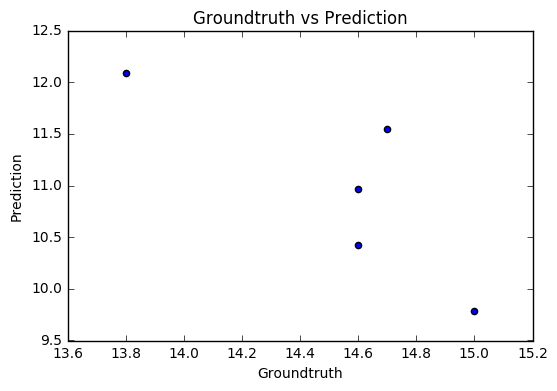

In [79]:
plt.scatter(y_gt_vec,y_pred_vec)
plt.xlabel('Groundtruth')
plt.ylabel('Prediction')
plt.title('Groundtruth vs Prediction')

In [55]:
# print(regression_object.predict(x)[105:109])
# print(regression_object.coef_)
# print(x[0:1,:].shape)

In [56]:
# use y_predict = coeffs*X + intercept for prediction and see if you have gotten their format

# obs = 105; # 1st observation
# data_vector = x[obs:obs+1,:] # Rank-2 view of data_vector
# intercept = regression_object.intercept_
# coeffs = regression_object.coef_
# print(data_vector.shape, coeffs.shape)
# print(data_vector, coeffs)
# print(np.dot(data_vector[0],coeffs[0]))

# Handling numpy arrays
# coeffs_1Darray = coeffs[0]
# data_vector_1Darray = data_vector[0]

# y_predict = (np.dot(coeffs_1Darray,data_vector_1Darray)) + intercept
# print('prediction = %f\n' %y_predict)

In [52]:
# Printing the first column of data matrix, which is time
# x[:,0:1]
# pred_y 

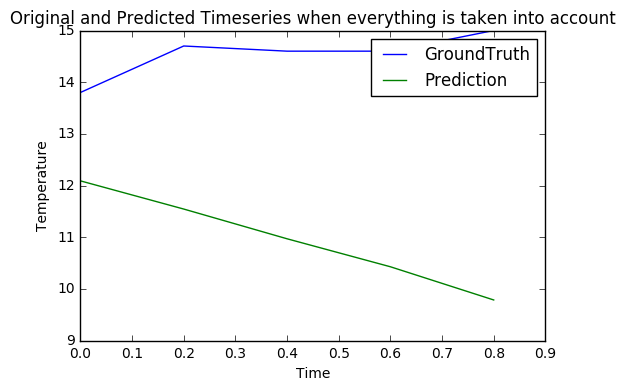

In [77]:
# time_index = x_t1_test[test_ind:test_ind + 5, 0:1];
time_index = np.arange(0,1,0.2)
# print(time_ind)
plt.plot(time_index,y_gt_vec,label="GroundTruth",color='b')
plt.plot(time_index,y_pred_vec,label="Prediction",color='g')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.title('Original and Predicted Timeseries when everything is taken into account')

In [78]:
print(time_index)
print(y_gt_vec)
print(y_pred_vec)

[ 0.   0.2  0.4  0.6  0.8]
[ 13.8  14.7  14.6  14.6  15. ]
[ 12.08988388  11.5443585   10.9687828   10.42728816   9.78453313]


In [58]:
# scatter plots of data 
# str_text='RainfallLast10Minutes'
# plt.scatter(y_gt_t1_train,df.as_matrix(columns=[str_text]),color='r')
# plt.xlabel('Temperature')
# plt.ylabel(str_text)

In [59]:
# df.as_matrix(columns=['Temperature'])